## TP6: Stiff problems and SymPy module

In [1]:
import numpy as np
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.layouts import row, column
from bokeh.models import Legend
import matplotlib.pyplot as plt
from scipy.optimize import root
from ipywidgets import interact, FloatSlider
output_notebook(hide_banner=True)
import sympy as sym

# Exercice 1: linear differential system

Consider the system of ODEs
$$
\begin{array}{|l}
u'(t)=-11u(t)+100v(t)\\
v'(t)=u(t)-11v(t)
\end{array},\quad t>0,
$$
with the initial conditions $u(0)=u_0$, $v(0)=v_0$.

**Q1. Solve this problem by hand for $u_0=v_0=1$.**

*Write your answer here.* You will work with the matrix exponential defined by 
$$
e^{tA}=\sum_{n=0}^{+\infty}\cfrac{t^n}{n!}A^n.
$$
Note. We remind the reader that if $A$ and $B$ commute ($AB=BA$), then we have $e^A\,e^B=e^{A+B}$. However this property is not true in general (see what happens with $A=\left(\begin{array}{cc}0 & \theta \\0 & 0 \end{array}\right)$ and $B=\left(\begin{array}{cc}0 & 0 \\-\theta & 0 \end{array}\right)$).

**Q2. What is the largest step size $h_{\star}$ allowed by absolute stability when this system is solved using explicit Euler's method?**

*Write your answer here.*

**Q3. Implement the explicit Euler method. Display on the same graph the exact solutions $u(t)$, $v(t)$ as well as the numerical solutions. Take successively $h=1.01h_{\star}$, $h=0.95h_{\star}$ and $h=0.5h_{\star}$. You should obtain three graphs corresponding to each of the values of $h$.**

In [2]:
def euler_explicit(f, t0, tf, h, x0):
    
    nt = int(round((tf-t0)/h))+1 #number of column of the output array
    nt+= int(tf-(t0+(nt-1)*h)>1e-9) #in case tf-t0 is not a multiple of h
    t = t0

    x0_array = np.array(x0)
    neq = x0_array.size

    x = np.zeros((neq, nt)) 
    x[:,0] = x0_array    
    
    for it in range(nt-1):
        x[:,it+1] = x[:,it] + h*f(t0+it*h,x[:,it]) 

    return x

In [7]:
def W_exact(t):  
    res_1 = (11/20)*np.exp(-t)*10 - (9/20)*np.exp(-21*t)*10 
    res_2 = (11/20)*np.exp(-t)*1 - (9/20)*np.exp(-21*t)*(-1) 
    return np.array([res_1, res_2]) 

In [8]:
def t_approx(nt,h,t0,tf):
    t = t0+1.*h*np.arange(nt)
    t[nt-1] = tf
    return t

In [9]:
def f(t,x):
    x1,x2 = x 
    res_1 = -11*x1 + 100*x2 
    res_2 = x1 - 11*x2 
    return np.array([res_1, res_2]) 

<Figure size 1728x432 with 0 Axes>

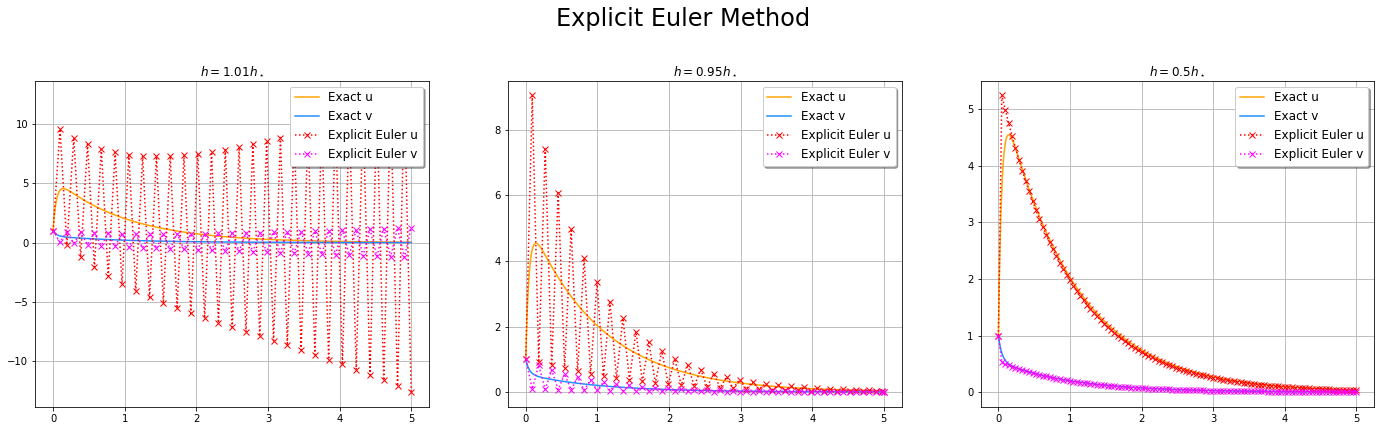

In [14]:
t0 = 0.
tf = 5
hstar=2/21 #To be modified
N = 500 # number of points for the exact solution
texa = np.linspace(t0,tf,N)
sol_exact = W_exact(texa)

h = 1.01*hstar
x2_approx1 = euler_explicit(f, t0, tf, h, [1,1])
nt1 = np.shape(x2_approx1)[1]
t_approx1 = t_approx(nt1,h,t0,tf)

h = 0.95*hstar
x2_approx2 = euler_explicit(f, t0, tf, h, [1,1])
nt2 = np.shape(x2_approx2)[1]
t_approx2 = t_approx(nt2,h,t0,tf)

h = 0.5*hstar
x2_approx3 = euler_explicit(f, t0, tf, h, [1,1])
nt3 = np.shape(x2_approx3)[1]
t_approx3 = t_approx(nt3,h,t0,tf)

fig = plt.figure()
plt.rcParams['figure.figsize'] = [24, 6]
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
fig.suptitle('Explicit Euler Method', y=1.05,fontsize=24) #to add space below the title

ax1.title.set_text('$h=1.01h_\star$')
ax1.plot(texa,sol_exact[0,:],color = 'orange')
ax1.plot(texa,sol_exact[1,:],color = 'dodgerblue')
ax1.plot(t_approx1,x2_approx1[0,:], "x:",color = 'red')
ax1.plot(t_approx1,x2_approx1[1,:], "x:",color = 'magenta')
ax1.legend(('Exact u', 'Exact v', 'Explicit Euler u', 'Explicit Euler v'),
           loc='upper right', shadow=True,fontsize=12)
ax1.grid()

ax2.title.set_text('$h=0.95h_\star$')
ax2.plot(texa,sol_exact[0,:],color = 'orange')
ax2.plot(texa,sol_exact[1,:],color = 'dodgerblue')
ax2.plot(t_approx2,x2_approx2[0,:], "x:",color = 'red')
ax2.plot(t_approx2,x2_approx2[1,:], "x:",color = 'magenta')
ax2.legend(('Exact u', 'Exact v', 'Explicit Euler u', 'Explicit Euler v'),
           loc='upper right', shadow=True,fontsize=12)
ax2.grid()

ax3.title.set_text('$h=0.5h_\star$')
ax3.plot(texa,sol_exact[0,:],color = 'orange')
ax3.plot(texa,sol_exact[1,:],color = 'dodgerblue')
ax3.plot(t_approx3,x2_approx3[0,:], "x:",color = 'red')
ax3.plot(t_approx3,x2_approx3[1,:], "x:",color = 'magenta')
ax3.legend(('Exact u', 'Exact v', 'Explicit Euler u', 'Explicit Euler v'),
           loc='upper right', shadow=True,fontsize=12)
ax3.grid()

**Q4. Make the same analysis for the implicit Euler's method. Comment your results.**

*Write your answer here.*

In [11]:
def euler_implicit(f, t0, tf, h, x0):
    
    nt = int(round((tf-t0)/h))+1 #number of column of the output array
    nt+= int(tf-(t0+(nt-1)*h)>1e-9) #in case tf-t0 is not a multiple of h
    t = t0

    x0_array = np.array(x0)
    neq = x0_array.size

    x = np.zeros((neq, nt))
    x[:,0] = x0_array
    
    it = 0
    def g(x,tn,xn):        
        return x-xn-h*f(tn,x)
    
    while t+h<=tf: 
        xn=x[:,it]
        tn=t
        ustart = xn+h*f(tn,xn) #initial guess for the root function        
        sol = root(g,ustart,(t,xn))
        x[:,it+1] = sol.x
        t += h
        it+=1                    
    return x

In [12]:
t0 = 0.
tf = 5
hstar=0.1 #To be modified

N = 500 # number of points for the exact solution
texa = np.linspace(t0,tf,N)
sol_exact = W_exact(texa)

h = hstar*0.1

ExpEuler_approx = euler_explicit(f, t0, tf, h, [1,1])
nt = np.shape(ExpEuler_approx)[1]
t = t_approx(nt,h,t0,tf)

ImpEuler_approx = euler_implicit(f, t0, tf, h, [1,1])

fig2 = figure(x_range=(t0, tf), y_range=(-0.5, 5), width=980, height=400, x_axis_label='t', y_axis_label='u, v')
plt_sol = fig2.line(texa,sol_exact[0], color = 'orange',legend_label = 'Exact u')
plt_sol = fig2.line(texa,sol_exact[1], color = 'dodgerblue',legend_label = 'Exact v')

plt_expEuler0 = fig2.circle(t,ExpEuler_approx[0],fill_color = 'white', color = 'red', legend_label = 'Exlicit Euler u', size = 8)
plt_expEuler1 = fig2.circle(t,ExpEuler_approx[1],fill_color = 'white', color = 'magenta', legend_label = 'Explicit Euler v', size = 8)

plt_impEuler0 = fig2.x(t,ImpEuler_approx[0],fill_color = 'white', color = 'chocolate', legend_label = 'Implicit Euler u', size = 8)
plt_impEuler1 = fig2.x(t,ImpEuler_approx[1],fill_color = 'white', color = 'limegreen', legend_label = 'Implicit Euler v', size = 8)

show(fig2,notebook_handle=True)

def update(h):

    ExpEuler_approx = euler_explicit(f, t0, tf, h, [1,1]) 
    ImpEuler_approx = euler_implicit(f, t0, tf, h, [1,1])        
    nt = np.shape(ImpEuler_approx)[1]
    t = t_approx(nt,h,t0,tf)
    
    plt_expEuler0.data_source.data = dict(x=t, y=ExpEuler_approx[0])
    plt_expEuler1.data_source.data = dict(x=t, y=ExpEuler_approx[1])
    plt_impEuler0.data_source.data = dict(x=t, y=ImpEuler_approx[0])
    plt_impEuler1.data_source.data = dict(x=t, y=ImpEuler_approx[1])
        
    push_notebook()

_ = interact(update, h=FloatSlider(min=hstar*1e-1, max=hstar*3, step=1e-1*hstar, value=hstar*0.2))


interactive(children=(FloatSlider(value=0.020000000000000004, description='h', max=0.30000000000000004, min=0.…

Critical value h = 0.1

This exercice is adapated from *Griffiths and Higham, Numerical Methods for Ordinary Differential Equations, Springer, 2010.*

# Exercise 2: analytic calculus with SymPy

It is possible to solve analytically certain ODEs and systems of ODEs with Python using the SymPy module of symbolic calculus. The documentation can be found here
https://docs.sympy.org/latest/modules/solvers/ode.html.

To explain how to proceed, first we consider the Cauchy problem
$$
\begin{array}{|l}
u'(t)=-3t^2u(t)+6t^2\\
u(0)=4.
\end{array}
$$

In [26]:
import sympy as sym

In [27]:
t   = sym.Symbol('t')
u   = sym.Function('u')
left  = sym.diff(u(t),t)
right = -3*t**2*u(t)+6*t**2
edo = sym.Eq( left , right )
display(edo)

Eq(Derivative(u(t), t), -3*t**2*u(t) + 6*t**2)

In [32]:
solgen = sym.dsolve(edo,u(t))
display(solgen)

Eq(u(t), C1*exp(-t**3) + 2)

To take into account the initial condition, we can write

In [41]:
t0=0
u0=4
consts = sym.solve( sym.Eq( u0, solgen.rhs.subs(t,t0)), dict=True)[0]
consts

{C1: 2}

In [42]:
solpar = solgen.subs(consts)
solpar

Eq(u(t), 2 + 2*exp(-t**3))

Then we transform the result into a function that we can evaluate thanks to the line

In [43]:
uRes = sym.lambdify(t,solpar.rhs,'numpy')

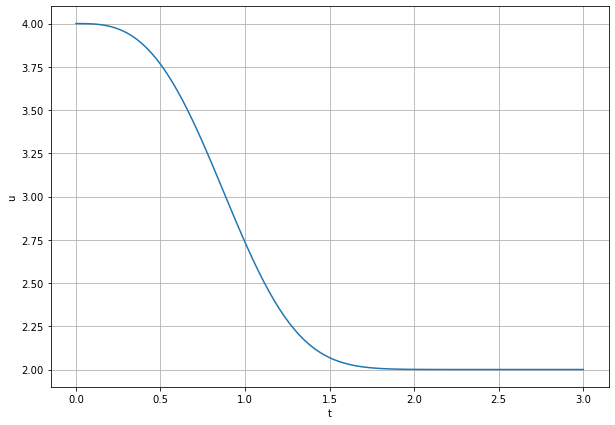

In [44]:
from matplotlib.pylab import *
figure(figsize=(10,7))
tt=linspace(0,3,101)
uu=uRes(tt)
plot(tt,uu)
xlabel('t')
ylabel('u')
grid();

**Q1. Consider the Cauchy problem
$$
\begin{array}{|l}
u'(t)=\cfrac{3t}{2}u(t)^2,\quad t>0\\
u(0)=a.
\end{array}
$$
Compute the solutions for $a=-3, -2, -1, -0.5, -0.25$ and display them on a graph with the vector field of the ODE.**


**Reminder on vector fields.** In general, we cannot get explicitly the solution of a given ODE. However, we can have a good idea of the graphs of its solutions by drawing the vector field associated with the problem. Indeed, by definition the graph of a solution to the equation $u'(t)=f(t,u(t))$ is tangential to its velocity vector $(1,u'(t))$ and so to the vector $(1,f(t,u(t))$. The knowledge of $f$ at each point $(t,u)$ allows us to represent at a cheap cost these tangential vectors even if we do not know the solutions. With Python, the function quiver of the matplotlib module allows one to draw such a vector field. 

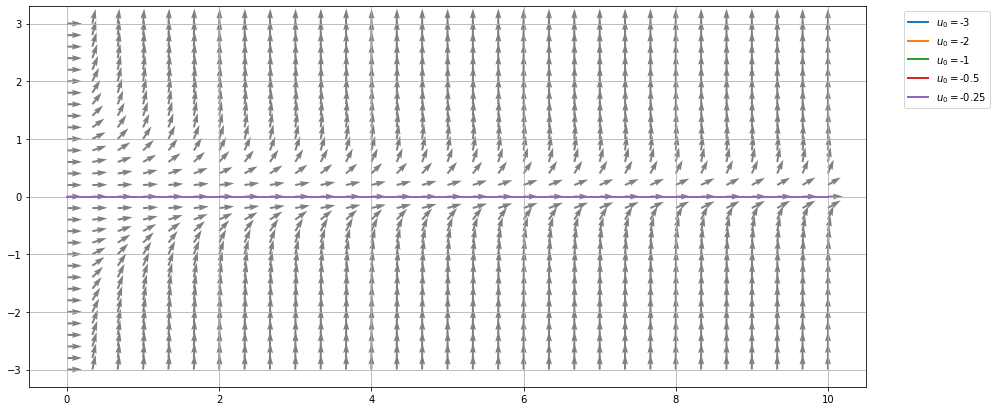

In [45]:
t_final = 10

phi_odeint = lambda u,t : 3*t*u**2/2
tt  = linspace(0,t_final,201)

figure(figsize=(15,7)) # facultatif

T,U = meshgrid(linspace(0,t_final,31),linspace(-3,3,31))
DT, DU = 1, phi_odeint(U,T) 
M = sqrt(DT**2+DU**2)   # norm growth rate 
M[ M == 0] = 1          # avoid zero division errors 
quiver(T,U, DT/M, DU/M,color='gray')
grid()

#########################
    #To be completed
#########################
for a in [-3, -2, -1,-0.5,-0.25]:        
    #########################
    #To be completed
    #########################
    plot(tt,np.zeros(tt.size),lw=2,label='$u_0=$'+str(a));
legend(bbox_to_anchor=(1.04,1),loc='upper left');


**Q2. With SymPy, we can also solve systems of ODEs. The code below allows one to obtain the solution of the Cauchy problem 
$$
\begin{array}{|l}
u'(t)=2v(t),\quad t>0\\
v'(t)=-u(t),\\
u(0)=2,\quad v(0)=1.
\end{array}
$$
Adapt it to solve the Cauchy problem of the previous exercise.**

In [46]:
t  = sym.Symbol('t')

u = sym.Function('u')
v = sym.Function('v')

right1 = 2*v(t)
right2 = -u(t)

edo1 = sym.Eq( sym.diff(u(t),t) , right1 )
edo2 = sym.Eq( sym.diff(v(t),t) , right2 )
display(edo1)
display(edo2)

solgen = sym.dsolve([edo1,edo2],[u(t),v(t)])
display(solgen)

Eq(Derivative(u(t), t), 2*v(t))

Eq(Derivative(v(t), t), -u(t))

[Eq(u(t), sqrt(2)*C1*sin(sqrt(2)*t) + sqrt(2)*C2*cos(sqrt(2)*t)),
 Eq(v(t), C1*cos(sqrt(2)*t) - C2*sin(sqrt(2)*t))]

{C2: sqrt(2), C1: 1}

Eq(u(t), sqrt(2)*sin(sqrt(2)*t) + 2*cos(sqrt(2)*t))

Eq(v(t), -sqrt(2)*sin(sqrt(2)*t) + cos(sqrt(2)*t))

<Figure size 1296x504 with 0 Axes>

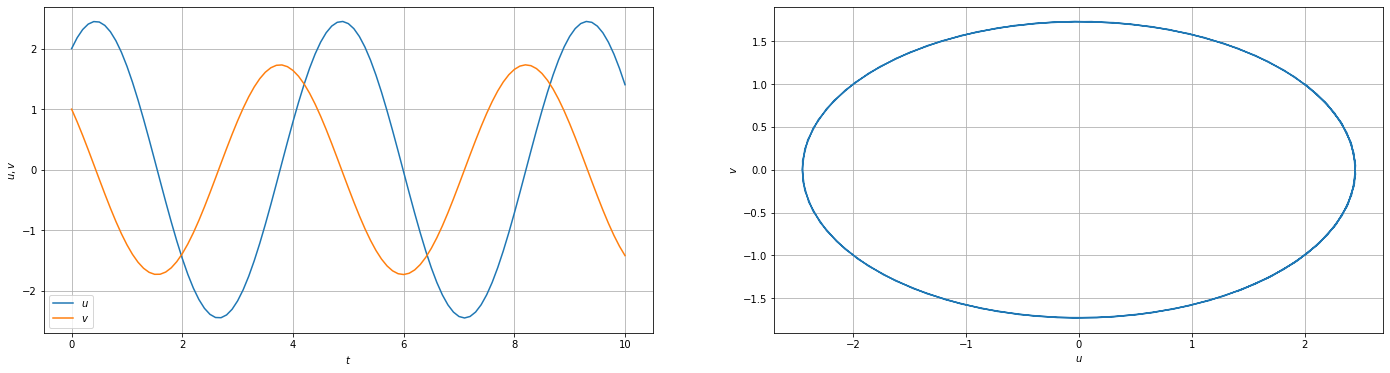

In [48]:
t0  =0
u_0=2
v_0=1
consts = sym.solve( [sym.Eq( u_0, solgen[0].rhs.subs(t,t0)) , 
                     sym.Eq( v_0, solgen[1].rhs.subs(t,t0)) ] , dict=True)[0]
display(consts)

solpar_1=solgen[0].subs(consts)
solpar_2=solgen[1].subs(consts)
display(solpar_1)
display(solpar_2)

func_1 = sym.lambdify(t,solpar_1.rhs,'numpy')
func_2 = sym.lambdify(t,solpar_2.rhs,'numpy')

from matplotlib.pylab import *
figure(figsize=(18,7))

tt=linspace(0,10,101)
uu=func_1(tt)
vv=func_2(tt)
ax=plt.subplots(1, 2)
subplot(1,2,1)
plot(tt,uu,tt,vv)
grid()
legend([r'$u$',r'$v$'])
xlabel(r'$t$')
ylabel(r'$u,v$')

subplot(1,2,2)
plot(uu,vv)
grid()
xlabel(r'$u$')
ylabel(r'$v$');

This exercise is adapted from a TP by Gloria Faccanoni given at the university of Toulon.

# Exercise 3: adaptive step size selection

All the methods we have discussed so far involve a fixed step size $h$. In this exercise, we consider the possibility of taking a varying $h$, more precisely $h_n$ at step $n$, in order to improve efficiency, that is to obtain the same accuracy with
fewer steps or better accuracy with the same number of steps. We want to adapt the step size to local conditions so as to take short steps when the solution varies rapidly and longer steps when there is relatively little activity. The process
of calculating suitable step sizes should be automatic (by formula rather than by human intervention) and inexpensive (accounting for a small percentage of the overall computing cost, otherwise one might as well repeat the calculations with a smaller, constant step size $h$).

Taylor Series Methods are the most straightforward methods for which to design step size selection. The TS(p) method leads to consider the scheme
$$
x_{n+1}=x_n+h_nx_n'+\cfrac{1}{2!}h^2_nx_n''+\dots+\cfrac{1}{p!}h^{p}_nx_n^{(p)}.
$$
The leading term in the local truncation error from $t_n$ to $t_{n+1}$ is given by
$$
T_{n+1}=\cfrac{1}{(p+1)!}h^{p+1}_nx(t_n)^{(p+1)}
$$
where $x$ designates the exact solution. The quantity $T_{n+1}$ can be approximated by differentiating the ODE $p$ times and replacing $x(t_n)$ by $x_n$. The step size $h_n$ is then chosen such that
$$
h_n=\left|\cfrac{(p+1)!\mathrm{tol}}{x(t_n)^{(p+1)}}\right|^{1/(p+1)}
$$
where $\mathrm{tol}$ is a prescribed tolerance. 

**Q1. Apply the TS(1) and TS(2) methods to solve the logistic ODE 
$$
\begin{array}{|l}
x'(t)=px(t)(1-\cfrac{x(t)}{N}),\qquad t>0,\\
x(0)=0.01
\end{array}
$$
using adaptative step size selection. Take $p=10$ and $N=1$. Try with $\mathrm{tol}=10^{-3}$. Compare with the  TS(1) and TS(2) methods without step size selection both in terms of accuray and number of steps.**

Note. This might model the development of a population. Then $p$ and $N$ are known as the proliferation rate and carrying capacity (i.e., the maximum sustainable population). For $N=1$, the solution is given by
$$
x(t)=\cfrac{1}{1+(\frac{1}{x_0}-1)e^{-pt}}.
$$
The function $x(t)$ is sometimes called the sigmoid function. 

To implement TS(1) with the adaptative step size selection, we need to compute $x(t_n)^{(2)}$. Set $f(t,x)=px(1-x)$. Differentiating the ODE with respect to $t$, we find
$$
x(t_n)^{(2)}=g_1(t_n,x_n)\quad\mbox{ with }\quad g_1(t,x)=\partial_t f(t,x) + \partial_x f(t,x) f(t,x).
$$
For our problem, we have
$$
g_1(t,x) =  write\ your\ answer\ here.
$$

In [72]:
def f(t,x):
    return 10*x*(1-x)

In [73]:
def g1(t,x):
    return (10*(1-x)-10*x)*10*x*(1-x)

In [74]:
def TS1_Step_Select(t0, tf, x0, tol):
    vect=[]
    vecx=[]
    t    = t0                      #initial time
    vect = np.append(vect, [t0])
    vecx = np.append(vecx, [x0])
    xn=x0
    while t<=tf:
        h = np.abs(2*tol / g1(t,xn))**(1/2) # /!\ to modify here /!\ 
        xnnew = xn + h*f(t,xn) 
        t += h
        xn=xnnew
        vect= np.append(vect, [t])
        vecx= np.append(vecx, [xn])         
    return vecx,vect

In [75]:
def TS1(t0, tf, x0, h):   
    vect=[]
    vecx=[]
    t    = t0                      #initial time
    vect = np.append(vect, [t0])
    vecx = np.append(vecx, [x0])
    xn=x0
    while t<=tf:          
        xnnew = xn + h*f(t,xn) 
        t += h
        xn=xnnew
        vect= np.append(vect, [t])
        vecx= np.append(vecx, [xn])         
    return vecx,vect

In [76]:
def x_exa(t):
    return 1/(1+(1/0.01-1)*np.exp(-10*t))

In [77]:
t0 = 0.
tf = 2.0
x0 = 0.01
tol = 1e-3

[x_TS1_Step_Select,t_TS1_Step_Select]  = TS1_Step_Select(t0, tf, x0, tol)
[x_TS1,t_TS1]  = TS1(t0, tf, x0, 0.025)
print('Number of iterations for TS1_Step_Select =',np.size(t_TS1_Step_Select))
print('Number of iterations for classical TS1 =',np.size(t_TS1))

N = 100 # number of points for the exact solution
texa = np.linspace(t0,tf,N)
xexa = x_exa(texa)

fig1 = figure(x_range=(t0, tf), width=960, height=400, x_axis_label='t', y_axis_label='x(t)')
fig1.line(texa,xexa,legend_label = 'Exact solution')
fig1.circle(t_TS1_Step_Select,x_TS1_Step_Select, color = 'navy', legend_label = 'TS1 step size selection', size = 8)
fig1.circle(t_TS1,x_TS1, color = 'magenta', legend_label = 'TS1', size = 8)
show(fig1)

fig2 = figure(x_range=(t0, tf), width=960, height=400, x_axis_label='t', y_axis_label='error')
fig2.circle(t_TS1_Step_Select,abs(x_TS1_Step_Select-x_exa(t_TS1_Step_Select)), color = 'navy',\
            legend_label = 'TS1 step size selection', size = 8)
fig2.circle(t_TS1,abs(x_TS1-x_exa(t_TS1)), color = 'magenta', legend_label = 'TS1', size = 8)
show(fig2)

Number of iterations for TS1_Step_Select = 50
Number of iterations for classical TS1 = 82


To implement TS(2) with the adaptative step size selection, we need to compute $x(t_n)^{(3)}$. Differentiating two times the ODE with respect to $t$, we find
$$
x(t_n)^{(3)}=g_2(t_n,x_n)\quad\mbox{ with }\quad g_2(t,x)=\partial_t g_1(t,x) + \partial_x g_1(t,x) f(t,x).
$$
*Write the expression of $g_2(t,x)$ here.*

In [ ]:
def g2(t,x):
    return 1 # to modify here

In [26]:
def TS2_Step_Select(t0, tf, x0, tol):
    vect=[]
    vecx=[]
    t    = t0                      #initial time
    vect = np.append(vect, [t0])
    vecx = np.append(vecx, [x0])
    xn=x0
    while t<=tf:
        h = 0.01 # to modify here
        xnnew = xn + h*f(t,xn) + h**2*g1(t,xn)/2
        t += h
        xn=xnnew
        vect= np.append(vect, [t])
        vecx= np.append(vecx, [xn])         
    return vecx,vect

In [27]:
def TS2(t0, tf, x0, h):   
    vect=[]
    vecx=[]
    t    = t0                      #initial time
    vect = np.append(vect, [t0])
    vecx = np.append(vecx, [x0])
    xn=x0
    while t<=tf:          
        xnnew = xn + h*f(t,xn) + h**2*g1(t,xn)/2
        t += h
        xn=xnnew
        vect= np.append(vect, [t])
        vecx= np.append(vecx, [xn])         
    return vecx,vect

In [29]:
t0 = 0.
tf = 3.0
x0 = 0.01
tol = 1e-4

[x_TS2_Step_Select,t_TS2_Step_Select]  = TS2_Step_Select(t0, tf, x0, tol)
[x_TS2,t_TS2]  = TS2(t0, tf, x0, 0.032)
print('Number of iterations for TS2_Step_Select =',np.size(t_TS2_Step_Select))
print('Number of iterations for classical TS2 =',np.size(t_TS2))

N = 100 # number of points for the exact solution
texa = np.linspace(t0,tf,N)
xexa = x_exa(texa)

fig1 = figure(x_range=(t0, tf), width=960, height=400, x_axis_label='t', y_axis_label='x(t)')
fig1.line(texa,xexa,legend_label = 'Exact solution')
fig1.circle(t_TS2_Step_Select,x_TS2_Step_Select, color = 'navy', legend_label = 'TS2 step size selection', size = 8)
fig1.circle(t_TS2,x_TS2, color = 'magenta', legend_label = 'TS2', size = 8)
show(fig1)

fig2 = figure(x_range=(t0, tf), width=960, height=400, x_axis_label='t', y_axis_label='error')
fig2.circle(t_TS2_Step_Select,abs(x_TS2_Step_Select-x_exa(t_TS2_Step_Select)), color = 'navy',\
            legend_label = 'TS2 step size selection', size = 8)
fig2.circle(t_TS2,abs(x_TS2-x_exa(t_TS2)), color = 'magenta', legend_label = 'TS2', size = 8)
show(fig2)

Number of iterations for TS2_Step_Select = 302
Number of iterations for classical TS2 = 95


**Q2. Adapt the method to solve the stiff problem of exercise 1.**

This exercice is adapated from *Griffiths and Higham, Numerical Methods for Ordinary Differential Equations, Springer, 2010.*